In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from keras.utils import plot_model

In [2]:
data = loadtxt('heart.csv', delimiter=',', skiprows=1)

In [3]:
x = data[:, 0:12]
y = data[:, 13]

In [4]:
print('x:',x, 'y:', y)

x: [[52.   1.   0.  ...  1.   2.   2. ]
 [53.   1.   0.  ...  3.1  0.   0. ]
 [70.   1.   0.  ...  2.6  0.   0. ]
 ...
 [47.   1.   0.  ...  1.   1.   1. ]
 [50.   0.   0.  ...  0.   2.   0. ]
 [54.   1.   0.  ...  1.4  1.   1. ]] y: [0. 0. 0. ... 0. 1. 0.]


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(717, 12) (308, 12) (717,) (308,)


In [7]:
model = Sequential(
    [
        Dense(64, input_dim=12, activation='relu'),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

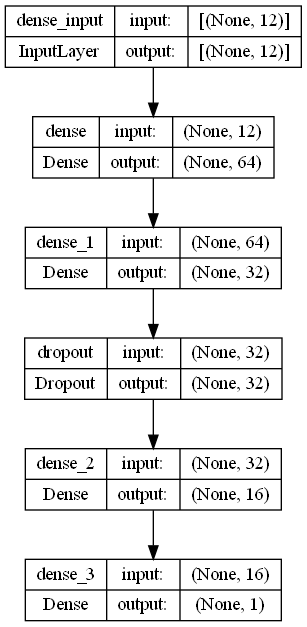

In [8]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0)

In [11]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('model loss: %.2f, model accuracy: %.2f' % ((loss*100),(accuracy*100)))

model loss: 47.46, model accuracy: 76.30


In [12]:
predictions = model.predict_classes(x_test)
m = 0
for i in range(len(x_test)):
    if predictions[i] == 1:
        m += 1
    print('predicted %d ===> expected %d' % (predictions[i], y_test[i]))
print(m)

AttributeError: 'Sequential' object has no attribute 'predict_classes'